In this example, we'll analyse Meta's Q2 2023 earning call, and will try to chat with the data.

In [1]:
!pip install langchain pypdf langchain_openai langchain_community \
tiktoken chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.1 MB/s eta 0:

## Setup

In [3]:
import os
import getpass

#if not os.environ.get("OPEN_API_KEY"):
os.environ["OPENAI_API_KEY"] = getpass.getpass("OPENAI API Key:\n")

OPENAI API Key:
··········


## Document Loading

LangChain has multiple types of document loaders which can be used to load PDFs, videos, URL data, and much more.



### Loading data from URL

In [4]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://raw.githubusercontent.com/google/styleguide/gh-pages/pyguide.md")
pages = loader.load()

In [5]:
pages[0].page_content

'\n\n# Google Python Style Guide\n\n\n\nTable of Contents\n\n-   [1 Background](#s1-background)\n-   [2 Python Language Rules](#s2-python-language-rules)\n    *   [2.1 Lint](#s2.1-lint)\n    *   [2.2 Imports](#s2.2-imports)\n    *   [2.3 Packages](#s2.3-packages)\n    *   [2.4 Exceptions](#s2.4-exceptions)\n    *   [2.5 Mutable Global State](#s2.5-global-variables)\n    *   [2.6 Nested/Local/Inner Classes and Functions](#s2.6-nested)\n    *   [2.7 Comprehensions & Generator Expressions](#s2.7-comprehensions)\n    *   [2.8 Default Iterators and Operators](#s2.8-default-iterators-and-operators)\n    *   [2.9 Generators](#s2.9-generators)\n    *   [2.10 Lambda Functions](#s2.10-lambda-functions)\n    *   [2.11 Conditional Expressions](#s2.11-conditional-expressions)\n    *   [2.12 Default Argument Values](#s2.12-default-argument-values)\n    *   [2.13 Properties](#s2.13-properties)\n    *   [2.14 True/False Evaluations](#s2.14-truefalse-evaluations)\n    *   [2.16 Lexical Scoping](#s2.16-

### Loading PDFs

By using `PyPDFLoader` class, we were able to load a PDF file.


In [7]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("/content/META-Q2-2023-Earnings-Call-Transcript.pdf")
pages = loader.load()

In [8]:
len(pages) # 19 pages

19

## Document Splitting


We need to create chunks from our document in order to get relevant answers from language models. It's important to note that the chunks should make sense semantically. Hence, we use text splitters offered by LangChain.

### CharacterTextSplitter



In [9]:
from langchain.text_splitter import CharacterTextSplitter

chunk_size = 450
chunk_overlap = 0

splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

documents = splitter.split_documents(pages)

In [10]:
documents[0].page_content

"1 \n \nMeta Platforms, Inc. (META) \nSecond Quarter 2023 Results Conference Call \nJuly 26th, 2023 \n \nKen Dorell, Director, Investor Relations \n \nThank you. Good afternoon and welcome to Meta Platforms second quarter 2023 earnings conference \ncall. Joining me today to discuss our results are Mark Zuckerberg, CEO and Susan Li, CFO. \n \nBefore we get started, I would like to take this opportunity to remind you that our remarks today will \ninclude forward‐looking statements. Actual results may differ materially from those contemplated by \nthese forward‐looking statements. \n \nFactors that could cause these results to differ materially are set forth in today’s press release, and in \nour quarterly report on form 10-Q filed with the SEC. Any forward‐looking statements that we make on \nthis call are based on assumptions as of today and we undertake no obligation to update these \nstatements as a result of new information or future events. \n \nDuring this call we will present both

### Recursive Character Text Splitter



In [11]:
# Splitting documents into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [12]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separators=["\n\n", "\n", " ", ""]
)

We are using `RecursiveCharacterTextSplitter` to split our document. It splits on characters, and if further chunking is required, it does it recursively. We can pass a list of separators (usually periods). In the first iteration, text will be splitted on the first separator. It will then try to split the text further on the second separator and so on.

We have other types of splitters —

1. TokenTextSplitter: Split on tokens
2. MarkdownHeaderTextSplitter: Great for preserving markdown metadata

In [13]:
documents = splitter.split_documents(pages)

In [14]:
for document in documents:
  print(document.page_content)

1 
 
Meta Platforms, Inc. (META) 
Second Quarter 2023 Results Conference Call 
July 26th, 2023 
 
Ken Dorell, Director, Investor Relations 
 
Thank you. Good afternoon and welcome to Meta Platforms second quarter 2023 earnings conference 
call. Joining me today to discuss our results are Mark Zuckerberg, CEO and Susan Li, CFO. 
 
Before we get started, I would like to take this opportunity to remind you that our remarks today will
include forward‐looking statements. Actual results may differ materially from those contemplated by 
these forward‐looking statements. 
 
Factors that could cause these results to differ materially are set forth in today’s press release, and in 
our quarterly report on form 10-Q filed with the SEC. Any forward‐looking statements that we make on 
this call are based on assumptions as of today and we undertake no obligation to update these
statements as a result of new information or future events. 
 
During this call we will present both GAAP and certain non‐G

### Token Splitting

Roughly, a token is a string of 4 characters.

We can use `TokenTextSplitter` to split based on tokens. We need `tiktoken` to use this.

In [15]:
from langchain.text_splitter import TokenTextSplitter
chunk_size =200
splitter = TokenTextSplitter(chunk_size=chunk_size, chunk_overlap=0)
documents = splitter.split_documents(pages)

In [16]:
documents[0].page_content

'1 \n \nMeta Platforms, Inc. (META) \nSecond Quarter 2023 Results Conference Call \nJuly 26th, 2023 \n \nKen Dorell, Director, Investor Relations \n \nThank you. Good afternoon and welcome to Meta Platforms second quarter 2023 earnings conference \ncall. Joining me today to discuss our results are Mark Zuckerberg, CEO and Susan Li, CFO. \n \nBefore we get started, I would like to take this opportunity to remind you that our remarks today will \ninclude forward‐looking statements. Actual results may differ materially from those contemplated by \nthese forward‐looking statements. \n \nFactors that could cause these results to differ materially are set forth in today’s press release, and in \nour quarterly report on form 10-Q filed with the SEC. Any forward‐looking statements that we make on \nthis call are based on assumptions as of'

## Vector storage & Embeddings

Embeddings are vector representations of data.

Suppose we have two documents d1 and d2. To compare them, we first create embeddings e1 and e2, and the similarity between them is proportional to the dot product of vectors e1 and e2.

To create embeddings, we can use the OpenAIEmbedding class.


In [17]:
from langchain_openai import OpenAIEmbeddings # HuggingFaceEmbeddings

embedding = OpenAIEmbeddings()

Now that we have vectors, we need a way to store them. We use a special type of database called as "Vector Databases". ChromaDB is one popular vector database.

In [18]:
from langchain.vectorstores import Chroma

In [19]:
persist_directory = './chroma1'

In [20]:
!rm -rf ./chroma # Removing old/irrelevant data

In [21]:
vdb = Chroma.from_documents(
    documents=documents,
    embedding=embedding,
    persist_directory=persist_directory
)

In [22]:
print(vdb._collection.count())

84


### Search

In [23]:
vdb.similarity_search("what is the total revenue for Reality Labs segment?", k=3)

[Document(metadata={'creator': 'Microsoft® Word for Microsoft 365', 'page_label': '5', 'title': 'META Q2 2023 Earnings Call Transcript', 'creationdate': '2023-07-26T20:36:45-07:00', 'total_pages': 19, 'moddate': '2023-07-26T20:36:45-07:00', 'author': 'Jonathan Rong Li', 'page': 4, 'producer': 'Microsoft® Word for Microsoft 365', 'source': '/content/META-Q2-2023-Earnings-Call-Transcript.pdf'}, page_content=', Q2 revenue was $276 million, down 39% due to lower Quest 2 sales. \nReality Labs expenses were $4.0 billion, up 23% due to lapping a reduction in Reality Labs loss reserves \nin Q2 of last year as well as growth in employee-related costs. \n \nReality Labs operating loss was $3.7 billion. \n \nTurning now to the business outlook. There are two primary factors that drive our revenue \nperformance: Our ability to deliver engaging experiences for our community, and our effectiveness at \nmonetizing that engagement over time.'),
 Document(metadata={'page': 3, 'producer': 'Microsoft® Wo

## Retrieval

Before looking into different ways of retreival, let's fix the issue we faced with previous query.

### Filtering by metadata

We can pass parameter `filter` in order to filter results from a specific part of the document.

In [24]:
vdb.similarity_search("what questions were asked by Eric from Goldman Sachs?", k=3, filter={'page': 9})

[Document(metadata={'page_label': '10', 'moddate': '2023-07-26T20:36:45-07:00', 'page': 9, 'producer': 'Microsoft® Word for Microsoft 365', 'creator': 'Microsoft® Word for Microsoft 365', 'creationdate': '2023-07-26T20:36:45-07:00', 'total_pages': 19, 'source': '/content/META-Q2-2023-Earnings-Call-Transcript.pdf', 'author': 'Jonathan Rong Li', 'title': 'META Q2 2023 Earnings Call Transcript'}, page_content="10 \n \nEric Sheridan:  Maybe one for Mark, one for Susan. Mark, just following up on Brian's question. I \ndid want to ask just to draw that out a little bit more, how you think about the \nextensions of the developer community sort of growing up around a platform like \nLlama 2. And we were intrigued by the Microsoft announcement. You traditionally \nhave been more of a consumer-facing company with product. Could this provide \nyou an avenue to be more of an enterprise-facing company over the long term? And \nis there a strategy there that maybe we haven't seen from you in the pas

We can see how we were able to get the right chunks when we filtered based on the metadata `page`.

#### Example of metadata addition and filtering


In [ ]:
import chromadb

# Initialize Chroma client
client = chromadb.Client()

# Create a collection with metadata filtering enabled
collection = client.create_collection(name="documents")

# Add documents with embeddings and metadata
collection.add(
    embeddings=[[0.12, 0.98, ...]],  # Precomputed vector
    ids=["doc_1"],
    metadatas=[{"category": "AI", "year": 2023, "source": "research paper"}]
)

# Query with metadata filtering
results = collection.query(
    query_embeddings=[[0.15, 0.95, ...]],  # Query embedding
    n_results=5,
    where={"category": "AI", "year": {"$gte": 2022}}  # Metadata filter
)

print(results)

#### Hybrid Search


Hybrid Search (Combining Text & Vector Search)

- Hybrid search combines keyword search (metadata-based) with vector similarity search.
- Example:
- Query: "latest AI laws in India"
- The system first filters documents with {"region": "India", "category": "AI laws"}.
- Then, it performs semantic similarity search on the filtered chunks.

✔ Metadata Filtering (where={"category": "AI"}) → Restricts results to AI-related documents.

✔ Vector Search (query_embeddings) → Finds semantically similar documents.

✔ Text Search (Title Matching) → You can add an extra step for keyword search on the title using BM25 or full-text search before ranking results.

### Diversity & MMR search

Sometimes the search results obtained from `similarity_search` can be duplicate (though releavant). This becomes a problem when all top results have duplicates. In order to diversify search results, we perform Maximum marginal relevance search. This ensures we get diversified results while maintaining relevance.

In [25]:
vdb.max_marginal_relevance_search("what were the discussions about ML models?",k=3,fetch_k=5)

[Document(metadata={'source': '/content/META-Q2-2023-Earnings-Call-Transcript.pdf', 'creationdate': '2023-07-26T20:36:45-07:00', 'producer': 'Microsoft® Word for Microsoft 365', 'author': 'Jonathan Rong Li', 'creator': 'Microsoft® Word for Microsoft 365', 'moddate': '2023-07-26T20:36:45-07:00', 'total_pages': 19, 'page': 16, 'page_label': '17', 'title': 'META Q2 2023 Earnings Call Transcript'}, page_content=" \ncan improve the quality of the model and improve the quality of the team that we \nhave that is working on that, that's a win for our business of basically building better \nproducts. \n \nSo I think you'll see both of those models. There are also some important safety \nquestions that I think we'll need to continue thinking about over time. There are a \nnumber of people who are out there saying that once the AI models get past a \ncertain level of capability, it can become dangerous for them to become just in the \nhands of everyone openly. I think -- what I think is pretty cl

**k**: This parameter controls the number of documents to ultimately return as the search result. In your code, k=3 means that the retriever will return the top 3 most relevant and diverse documents.


**fetch_k**: This parameter determines how many documents to initially retrieve from the vector store before applying the MMR algorithm for re-ranking and selection. Setting fetch_k=5 indicates that the retriever will initially fetch 5 documents from the vector store. MMR will then be used to select the best 3 out of these 5, balancing relevance and diversity.

### Contextual compression



Suppose there is a long paragraph, and some critical information is buried between the text. We can use `ContextualCompressionRetriever` to compress, and retrieve.

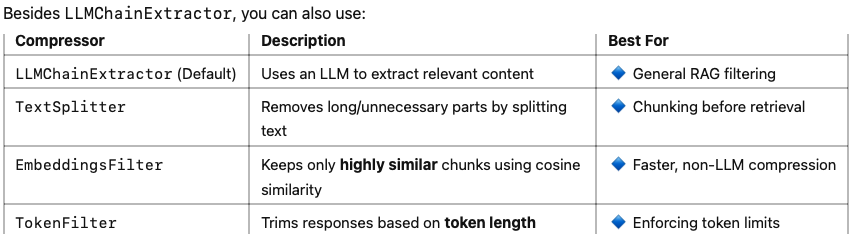

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
compressor = LLMChainExtractor.from_llm(llm)

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vdb.as_retriever()
)

question = "What is the growth rate of WhatsApp ads revenue?"
compressed_docs = compression_retriever.invoke(question)

In [ ]:
def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )

In [ ]:
pretty_print_docs(compressed_docs)

Document 1:

Daily Click-to-WhatsApp ads revenue continues to grow very quickly at over 80% year-over-year.
----------------------------------------------------------------------------------------------------
Document 2:

Q2 Family of Apps ad revenue was $31.5 billion, up 12% or 13% on a constant currency


#### Compare this to the semantic search

In [ ]:
question = "What is the growth rate of WhatsApp ads revenue?"
results = vdb.similarity_search(question, k=3)
results

[Document(metadata={'creationdate': '2023-07-26T20:36:45-07:00', 'producer': 'Microsoft® Word for Microsoft 365', 'page_label': '6', 'moddate': '2023-07-26T20:36:45-07:00', 'total_pages': 19, 'author': 'Jonathan Rong Li', 'creator': 'Microsoft® Word for Microsoft 365', 'page': 5, 'source': '/content/META-Q2-2023-Earnings-Call-Transcript.pdf', 'title': 'META Q2 2023 Earnings Call Transcript'}, page_content=' terms of driving onsite conversions, we continue to see strong results with Click-to-messaging \nads and are well positioned given our suite of messaging applications. Daily Click-to-WhatsApp \nads revenue continues to grow very quickly at over 80% year-over-year. We also recently started \ntesting the ability to buy Click-to-WhatsApp ads directly from the WhatsApp Business App, \nwhich now has more than 200 million monthly users. Looking ahead, we’re focused on enabling \nbusinesses to optimize for conversions further down the funnel in our messaging applications. \nWe are also inv

## Question & Answering

In [ ]:
question = "What was the total revenue in Q2 2023 from family of apps?"

In [ ]:
results = vdb.similarity_search(question, k=3)
results

[Document(metadata={'producer': 'Microsoft® Word for Microsoft 365', 'total_pages': 19, 'source': '/content/META-Q2-2023-Earnings-Call-Transcript.pdf', 'creator': 'Microsoft® Word for Microsoft 365', 'page': 4, 'author': 'Jonathan Rong Li', 'page_label': '5', 'title': 'META Q2 2023 Earnings Call Transcript', 'moddate': '2023-07-26T20:36:45-07:00', 'creationdate': '2023-07-26T20:36:45-07:00'}, page_content=' remains under pressure from these factors, we \nbelieve our ongoing improvements to ad targeting and measurement are continuing to drive improved \nresults for advertisers. \n \nFamily of Apps other revenue was $225 million in Q2, up 3%, as strong business messaging revenue \ngrowth from our WhatsApp Business Platform was partially offset by a decline in other line items. \n \nWe continue to direct the majority of our investments toward the development and operation of our \nFamily of Apps. In Q2, Family of Apps expenses were $18.6 billion, representing approximately 82% of \nour ov

In [ ]:
from langchain_openai import ChatOpenAI
llm_name = "gpt-3.5-turbo"
llm = ChatOpenAI(model_name=llm_name, temperature=0)

Now let's use `RetriverQA` to get a reply

In [ ]:
from langchain.chains import RetrievalQA

qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vdb.as_retriever()
)

In [ ]:
result = qa_chain.invoke({"query": question})
result["result"]

'In Q2 2023, the total revenue from the Family of Apps was $31.7 billion.'

### With Prompt Template

Sometimes we want to customise the type of answer given by the LLM. For example, if it is a CX app, it should thank the customer at the end of the answer. Let's try this with a prompt template.

In [ ]:
from langchain.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Be polite, and always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""

QA_CHAIN_PROMPT = PromptTemplate.from_template(template)

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vdb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [ ]:
result = qa_chain.invoke({"query": question})

In [ ]:
result

{'query': 'What was the total revenue in Q2 2023 from family of apps?',
 'result': 'The total revenue in Q2 2023 from the Family of Apps was $31.7 billion, up 12% year over year. Thanks for asking!',
 'source_documents': [Document(metadata={'creator': 'Microsoft® Word for Microsoft 365', 'page_label': '5', 'author': 'Jonathan Rong Li', 'title': 'META Q2 2023 Earnings Call Transcript', 'page': 4, 'total_pages': 19, 'moddate': '2023-07-26T20:36:45-07:00', 'producer': 'Microsoft® Word for Microsoft 365', 'creationdate': '2023-07-26T20:36:45-07:00', 'source': '/content/META-Q2-2023-Earnings-Call-Transcript.pdf'}, page_content=' remains under pressure from these factors, we \nbelieve our ongoing improvements to ad targeting and measurement are continuing to drive improved \nresults for advertisers. \n \nFamily of Apps other revenue was $225 million in Q2, up 3%, as strong business messaging revenue \ngrowth from our WhatsApp Business Platform was partially offset by a decline in other line 

In [ ]:
result["result"]

'The total revenue in Q2 2023 from the Family of Apps was $31.7 billion, up 12% year over year. Thanks for asking!'

### Limitations

While RetrievalQA is great for general question-answering, it fails to answer follow-up questions. Let'see an example.

In [ ]:
question = "And what was YoY change?"

In [ ]:
result = qa_chain({"query": question})
result["result"]

"I don't have enough information to provide an answer to that question. Thanks for asking!"

## Chatting & History

Let's try to preserve the historical conversation, and see if we can get answers to follow-up questions.

In [ ]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

<ipython-input-45-865cacf70752>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(


Instead of `RetriverQA`, we will use `ConversationalRetrievalChain`

In [ ]:
from langchain.chains import ConversationalRetrievalChain
retriever=vdb.as_retriever()
qa = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever,
    memory=memory
)

In [ ]:
question1 = "What was the total revenue in Q2 2023 from all family of apps?"
result = qa({"question": question1})
result['answer']

'The total revenue in Q2 2023 from all Family of Apps was $31.7 billion.'

In [ ]:
question2 = "And what was YoY change?"
result = qa({"question": question2})
result['answer']

'In Q2 2023, the total revenue from all Family of Apps was $31.7 billion, which was up 12% year over year.'